<a href="https://colab.research.google.com/github/shivamsaxena17493/Machine-Learning-Practice/blob/master/CNN_and_Reinforment_Lunar_Landing_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LunarLander CNN and RNN Modeling





In  the  OpenAI  Gym  game  Lunar  Lander
(https://gym.openai.com/envs/LunarLander-v2/) the player's job is to control a
small spaceship to land if safely on a landing pad. There are three thrusters which
can be used for control. These work in three directions: up, left, and right. The
player can also choose to do nothing. A dataset has been collected from an expert
player of LunarLander that contains screenshots of the state of the game and the
player's associated action (none, up, left, and right)

# Environment Setup

In [0]:
!pip install box2d-py

    100% |████████████████████████████████| 450kB 10.4MB/s 


In [0]:
!pip install gym

In [0]:
!apt-get install python-opengl -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (582 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 131304 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...


In [0]:
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 783 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.2 [783 kB]
Fetched 783 kB in 1s (1,008 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 133659 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.2_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.2) ...
Setting up xvfb (2:1.19.6-1ubuntu4.2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
!pip install pyvirtualdisplay

  Stored in directory: /root/.cache/pip/wheels/d1/8c/16/1c64227974ae29c687e4cc30fd691d5c0fd40f54446dde99da
  Stored in directory: /root/.cache/pip/wheels/41/22/19/af15ef6264c58b625a82641ed7483ad05e258fbd8925505227
Successfully built pyvirtualdisplay EasyProcess


In [0]:
!pip install rl

    100% |████████████████████████████████| 450kB 9.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/dc/d0/1a/2ed0a4189404d84c70096954f926ad799a97cdd18f0e3bb7b1
Successfully built rl


In [0]:
!pip install piglet

    100% |████████████████████████████████| 61kB 2.9MB/s 
    100% |████████████████████████████████| 92kB 7.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/c7/59/a5/5bd1a35a4a4596714c4c7925a1751e7b1580b6ced363fd7969
Successfully built piglet


In [0]:
!pip install keras-rl

    100% |████████████████████████████████| 40kB 3.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/4d/84/9254c9f2e8f51865cb0dac8e79da85330c735551d31f73c894
Successfully built keras-rl


In [0]:
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg- dev xvfb libav-tools xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package libav-tools is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  ffmpeg

E: Unable to locate package libjpeg
E: Unable to locate package dev
E: Package 'libav-tools' has no installation candidate


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Dataset unzip

# Import Packages

In [0]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,AveragePooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import RMSprop, adam
from keras import backend as K
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# to handle class imbalance
from imblearn.under_sampling import RandomUnderSampler


import sklearn
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.utils import shuffle

from IPython.display import SVG

import csv
import os 
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy as sp
import PIL

import sys, math
import numpy as np
from sklearn.externals import joblib
#import pickle
import cv2

# MOD Extra imports for image handling
from PIL import Image
import os
import time
import datetime
import keras

import Box2D
from Box2D.b2 import (edgeShape, circleShape, fixtureDef, polygonShape, revoluteJointDef, contactListener)

import gym
from gym import spaces
from gym.utils import seeding

%matplotlib inline




Using TensorFlow backend.


# Dataset Preparation

### Loading Image Data 

In [0]:
# dataset name
dataset_name = 'LunarLanderFrames/LunarLanderFramesPart1'

# assuming data is contained in a train and a validation set
train_data_dir = dataset_name + '/'

# Set up some parmaeters for data loading
sample_rate = 1.0

# desired dimensions of our images.
img_width, img_height = 84, 84

num_channels = 1

input_shape = (img_width, img_height, num_channels)
input_shape

(84, 84, 1)

**load image data and numpy array conversion**

In [0]:
# loading image data
image_class_folder = train_data_dir

# generate filenames from the data folder and do sampling
image_filenames = [image_class_folder+img for img in os.listdir(image_class_folder) if not img.startswith('.')] # use this for full dataset
image_filenames = random.sample(image_filenames, int(len(image_filenames)*sample_rate))

# Create a data array for image data
count = len(image_filenames)
print("Number of images: "+ str(count))

X_data = np.ndarray((count, num_channels, input_shape[0], input_shape[1]), dtype=np.float)

#X_data_part = np.ndarray((count, input_shape[0], input_shape[1],1), dtype=np.float)

# Initialise arrays for data storage
y_data = np.ndarray(count,dtype=np.int)

Number of images: 63671


In [0]:
X_data.shape

(63671, 1, 84, 84)

In [0]:
y_data.shape

(63671,)

### Performing Resizing, GrayScaling, Normalization Operations on Each Image

In [0]:
# Iterate through the filenames and for each one load the image, resize and normalise
for i, image_file in enumerate(image_filenames):

    # image grayscale conversion
    image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    
    # Low the images and resize them
    image = cv2.resize(image, (img_height, img_width), interpolation=cv2.INTER_CUBIC)
        
    # Add image data to data array and normalise
    X_data[i] = image
    X_data[i] = X_data[i]/255

    # extracting the class label from the image file name which action taken
    # 0 = none , 1 = up, 2 = left, 3 = right
    image_cls = int(image_file.split('_')[-1].split('.')[0])

    # Add label to label array
    y_data[i] = image_cls


In [0]:
print("Data shape: {}".format(X_data.shape))

Data shape: (63671, 1, 84, 84)


In [0]:
y_data.shape

(63671,)

In [0]:
np.bincount(y_data)

array([30187,  2220, 29095,  2169])

In [0]:
set(y_data)

{0, 1, 2, 3}

In [0]:
num_classes = len(set(y_data))

### Dataset split into Training and Testing

In [0]:
# Perfrom split to train, validation, test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    random_state=0,
                                                    test_size = 0.30, train_size = 0.7)


In [0]:
# Convert class vectors to binary class matrices.
y_train_encoder = sklearn.preprocessing.LabelEncoder()

y_train_num = y_train_encoder.fit_transform(y_train)
y_train_wide = keras.utils.to_categorical(y_train_num, num_classes)

y_test_num = y_train_encoder.fit_transform(y_test)
y_test_wide = keras.utils.to_categorical(y_test_num, num_classes)

In [0]:

classes_num_label = dict()

for idx, lbl in enumerate(y_train_encoder.classes_):
    classes_num_label[idx] = lbl


<BarContainer object of 4 artists>

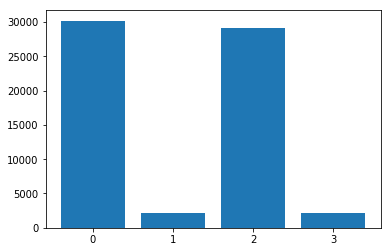

In [0]:
plt.bar(['0','1','2','3'] ,height=np.bincount(y_data))

### Handling Class Imbalance Using Under Sampler

In [0]:
under_sampler = RandomUnderSampler(return_indices=True)


In [0]:

X_train_us, y_train_us, sampled_index = under_sampler.fit_sample(X_train.reshape(len(X_train), img_height*img_width*num_channels), y_train)

X_train_us, y_train_us = shuffle(X_train_us, y_train_us)

X_train_us = X_train_us.reshape(len(X_train_us), num_channels ,img_height, img_width)

y_train_us_wide = keras.utils.to_categorical(y_train_us, num_classes)



<BarContainer object of 4 artists>

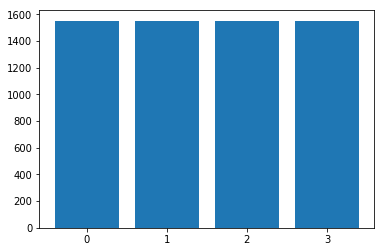

In [0]:
plt.bar(['0','1','2','3'] ,height=np.bincount(y_train_us))

In [0]:

X_test_us, y_test_us, sampled_index = under_sampler.fit_sample(X_test.reshape(len(X_test), img_height*img_width*num_channels), y_test)

X_test_us, y_test_us = shuffle(X_test_us, y_test_us)

X_test_us = X_test_us.reshape(len(X_test_us), num_channels ,img_height, img_width)

y_test_us_wide = keras.utils.to_categorical(y_test_us, num_classes)



<BarContainer object of 4 artists>

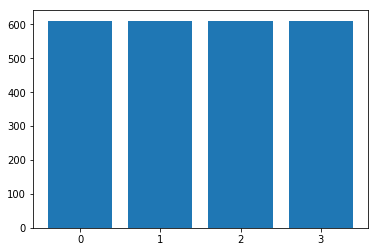

In [0]:
plt.bar(['0','1','2','3'] ,height=np.bincount(y_test_us))

### Training Images Checking

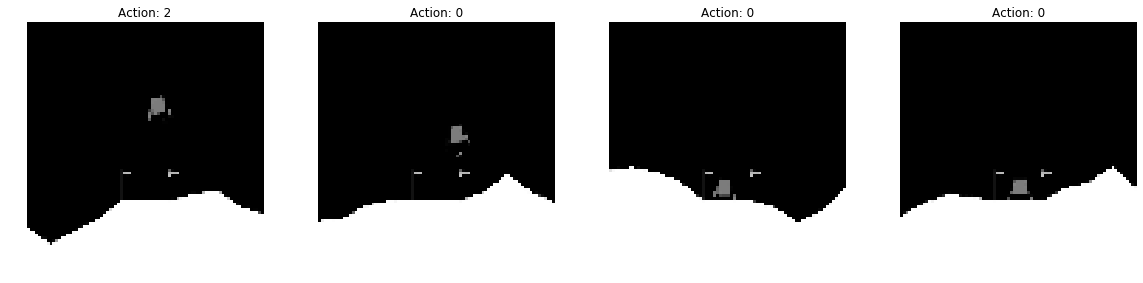

In [0]:

plt.figure(figsize=(20, 20))
for i in range(0,4):
    i_rand = random.randint(0, len(y_train))
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(X_train[i_rand][0], cmap='gray')
    plt.title(( "Action: " +  str(y_train[i_rand])))


In [0]:
input_shape

(84, 84, 1)

In [0]:
num_classes

4

### CNN Setup for Image Classification

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(num_channels, input_shape[0],input_shape[1]), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2),dim_ordering="th"))

model.add(Conv2D(64, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2),dim_ordering="th"))

model.add(Conv2D(64, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2),dim_ordering="th"))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=adam(lr=1e-3), metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), data_format="channels_first")`
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 84, 32)         24224     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 42, 16)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 42, 64)         9280      
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 42, 64)         256       
_________________________________________________________________
activation_3 (Activation)    (None, 1, 42, 64)         0         
_________________________________________________________________
average_pooling2d_3 (Average (None, 1, 21, 32)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 21, 64)         18496     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), data_format="channels_first")`
  from ipykernel import kernelapp as app


### Model Training and Saving Weights

In [0]:

batch_size = 128
epochs = 50

# Set up the callback to save the best model based on validaion data
best_weights_filepath = './best_weights_notebook21.hdf5'
mcp = ModelCheckpoint(best_weights_filepath, monitor="val_acc",
                      save_best_only=True, save_weights_only=False)

history = model.fit(X_train_us, y_train_us_wide,
          batch_size=batch_size,
          epochs=epochs,
          verbose = 1,
          validation_split = 0.2,
          shuffle=True,
          callbacks=[mcp])

#reload best weights
model.load_weights(best_weights_filepath)

Train on 4963 samples, validate on 1241 samples
Epoch 1/50
4963/4963 [==============================] - 7s 1ms/step - loss: 1.3849 - acc: 0.2897 - val_loss: 1.3935 - val_acc: 0.2667
Epoch 2/50
4963/4963 [==============================] - 6s 1ms/step - loss: 1.2478 - acc: 0.4304 - val_loss: 1.1981 - val_acc: 0.4432
Epoch 3/50
4963/4963 [==============================] - 6s 1ms/step - loss: 1.1043 - acc: 0.5273 - val_loss: 1.1045 - val_acc: 0.5036
Epoch 4/50
4963/4963 [==============================] - 6s 1ms/step - loss: 1.0042 - acc: 0.5678 - val_loss: 1.0250 - val_acc: 0.5576
Epoch 5/50
4963/4963 [==============================] - 6s 1ms/step - loss: 0.9647 - acc: 0.5753 - val_loss: 1.0726 - val_acc: 0.5230
Epoch 6/50
4963/4963 [==============================] - 6s 1ms/step - loss: 0.9286 - acc: 0.5898 - val_loss: 1.0245 - val_acc: 0.5576
Epoch 7/50
4963/4963 [==============================] - 6s 1ms/step - loss: 0.9131 - acc: 0.5952 - val_loss: 0.9514 - val_acc: 0.5745
Epoch 8/50
496

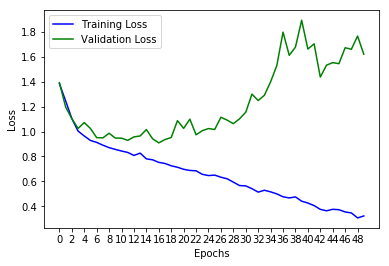

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::2])
plt.legend()
plt.show()

In [0]:
def print_confusion_matrix(conf_mat, cls_names, fig_size = (10,7), font_size = 14 ):
    # conf_mat = confusion matrix will be ndarray passed
    # cls_names = list of classes
    df_cm = pd.DataFrame(conf_mat, index=cls_names, columns=cls_names)
    fig = plt.figure(figsize=fig_size)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels( heatmap.yaxis.get_ticklabels(), 
                                    rotation=0, ha='right', fontsize=font_size)

    heatmap.xaxis.set_ticklabels( heatmap.xaxis.get_ticklabels(), 
                                    rotation=45, ha='right', fontsize=font_size)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return fig

### Evaluation of CNN Model 

In [0]:
# evaluation

# Make a set of predictions for the validation data
pred = model.predict(X_test_us)
pred = (np.argmax(pred,axis=1))

# Print performance details
print("Accuracy :", metrics.accuracy_score(y_test_us, pred))
print(metrics.classification_report(y_test_us, pred))

# Print confusion matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test_us, pred))
#display(pd.crosstab(test_labels, list(pred), margins=True))

Accuracy : 0.5687397708674304
              precision    recall  f1-score   support

           0       0.69      0.54      0.60       611
           1       0.62      0.71      0.67       611
           2       0.39      0.35      0.37       611
           3       0.57      0.67      0.62       611

   micro avg       0.57      0.57      0.57      2444
   macro avg       0.57      0.57      0.56      2444
weighted avg       0.57      0.57      0.56      2444

Confusion Matrix
[[327  92  94  98]
 [ 45 436 113  17]
 [ 44 159 216 192]
 [ 55  12 133 411]]


### Saving Model

In [0]:
# basic model save
path = "CNNbasic.mod"
model.save(path)

### Initializing Rendering Environment

In [0]:
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [0]:
!ls

best_weights_notebook21.hdf5  lunar_lander_ml_images_player.py
CNNbasic.mod		      lunarlander_ml_images_rewards.csv
drive			      lunar_lander_rl_player.py
lunar_lander_data_gen.py      sample_data
LunarLanderFrames


### CNN Supervised Model Deploy and Run for 200 Episodes

In [0]:
!python lunar_lander_ml_images_player.py

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
Instructions for updating:
Colocations handled automatically by placer.
2019-05-01 10:39:13.673599: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-05-01 10:39:13.673850: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x211a9a0 executing computations on platform Host. Devices:
2019-05-01 10:39:13.673886: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
Instructions for updating:
Use tf.cast instead.
['-0.01', '+0.95', '-0.60', '+0.19', '+0.01', '+0.09', '+0.00', '+0.00']
step 0 total_reward +1.17
['-0.12', '+0.92', '-0.51', '-0.34', '-0.22', '-0.30', '+0.00', '+0.00']
step 20 total_reward -15.61
['-0.24', '+0.74', '-

### Analysing Images Player Rewards

In [0]:
images_player_rewards = pd.read_csv('lunarlander_ml_images_rewards.csv',header=None, names=['Rewards'])

In [0]:
images_player_rewards

,Rewards
0,-409.456273
1,-557.229106
2,-219.016402
3,-330.135053
4,-287.836485
5,-364.092188
6,-238.261040
7,-371.627107
8,-264.950594
9,-455.886228


In [0]:
images_player_rewards.describe()

,Rewards
count,200.000000
mean,-341.607061
std,158.374381
min,-985.059619
25%,-453.321552
50%,-341.700631
75%,-218.809035
max,-26.431986


### DeepQ Reinforcement Learning Model Deploy and Run for 200 Episodes

In [0]:
!python lunar_lander_rl_player_epsgreedy.py

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
2019-05-01 11:08:48.395457: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-05-01 11:08:48.395717: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x2e6a2c0 executing computations on platform Host. Devices:
2019-05-01 11:08:48.395753: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
Training for 100000 steps ...
/usr/local/lib/python3.6/dist-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
Instructions for updating:
Use tf.cast instead.
    92/100000: episode: 1, duration: 0.883s, episode steps: 92, steps per second: 104, episode reward: -332.991, me

### Analysing RL Player Rewards

In [0]:
rl_player_rewards = pd.read_csv('lunarlander_rl_rewards_epqgreedy.csv',header=None, names=['Rewards'])

In [0]:
rl_player_rewards

,Rewards
0,-5.100
1,-61.237
2,-103.472
3,-181.379
4,-53.578
5,-5.149
6,-70.651
7,-119.932
8,-43.108
9,-60.553


In [0]:
rl_player_rewards.describe()

,Rewards
count,200.000000
mean,-71.535130
std,39.349269
min,-209.412000
25%,-98.198500
50%,-70.904500
75%,-48.169500
max,6.476000


In [0]:
!python lunar_lander_rl_player_BoltzmannQPolicy.py

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
2019-05-01 15:26:51.999302: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-05-01 15:26:52.004201: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x2a862c0 executing computations on platform Host. Devices:
2019-05-01 15:26:52.004300: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
Training for 100000 steps ...
/usr/local/lib/python3.6/dist-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
Instructions for updating:
Use tf.cast instead.
    87/100000: episode: 1, duration: 1.204s, episode steps: 87, steps per second: 72, episode reward: -15.341, mean

In [0]:
rl_player_boltzpolicy_rewards

,Rewards
0,178.547
1,-97.856
2,167.812
3,154.052
4,129.389
5,12.555
6,187.927
7,139.752
8,62.067
9,19.812


In [0]:
rl_player_boltzpolicy_rewards = pd.read_csv('lunarlander_rl_rewards.csv',header=None, names=['Rewards'])

In [0]:
rl_player_boltzpolicy_rewards.describe()

,Rewards
count,200.000000
mean,102.808015
std,76.850644
min,-97.856000
25%,40.891750
50%,129.250500
75%,159.004750
max,231.255000


### Reward Visualization

In [0]:
def rewardLineViz(title,cnn_rewards_df,rl_rewards_df, rl_boltz_rewards_df):
  plt.figure(figsize = (20,5),dpi = 100)
  plt.plot(cnn_rewards_df)
  plt.plot(rl_rewards_df)
  plt.plot(rl_boltz_rewards_df)
  plt.title(title + "\n")
  plt.ylabel("Reward")
  plt.xlabel("Episode")
  plt.xticks(np.arange(0,200,5))
  plt.legend(['CNN Rewards', 'RL EpsGreedyQPolicy', 'RL BoltzmannQPolicy'], loc='lower left')
  plt.show()

# The Results of the experiments.

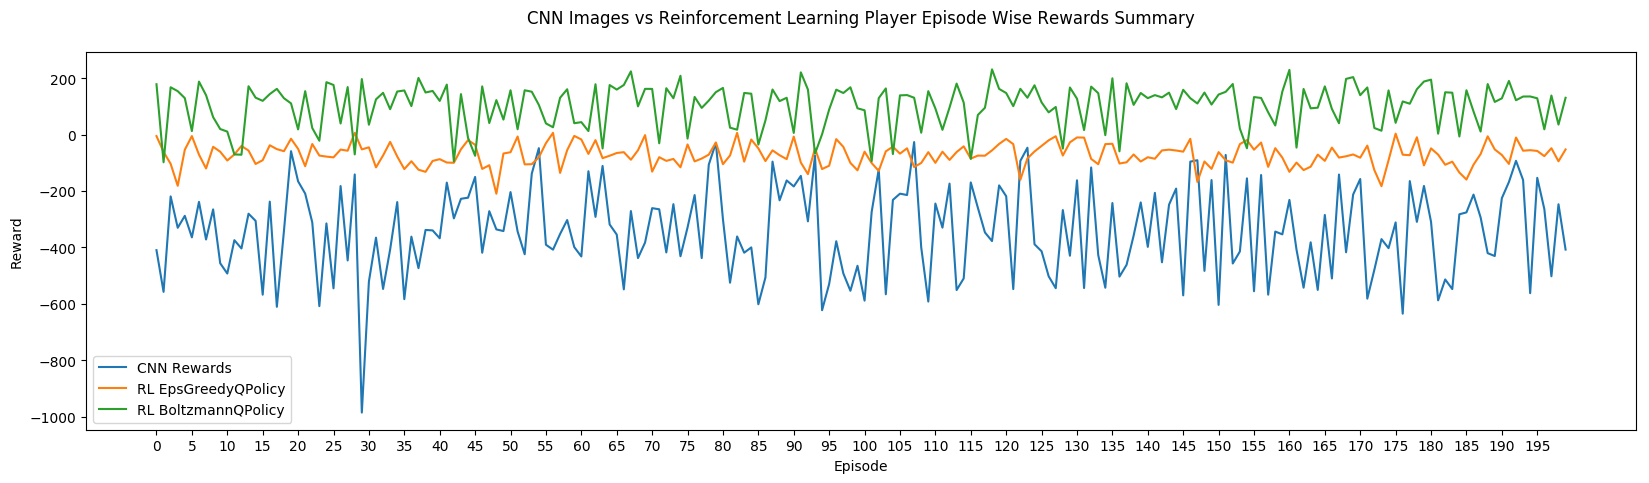

In [0]:
rewardLineViz("CNN Images vs Reinforcement Learning Player Episode Wise Rewards Summary", images_player_rewards, rl_player_rewards, rl_player_boltzpolicy_rewards)

Basic CNN Model Rewards Boxplot


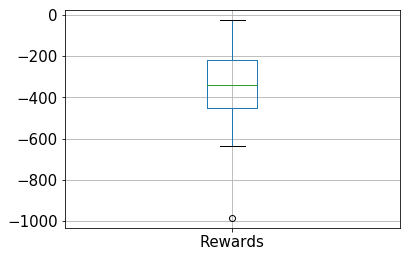

In [0]:
print("Basic CNN Model Rewards Boxplot")
images_player_rewards.boxplot(grid = True,fontsize=15)

RL EPSGreedy Model Rewards Boxplot


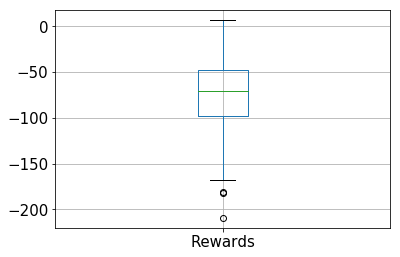

In [0]:
print("RL EPSGreedy Model Rewards Boxplot")
rl_player_rewards.boxplot(grid = True,fontsize=15)

RL Boltzman Model Rewards Boxplot


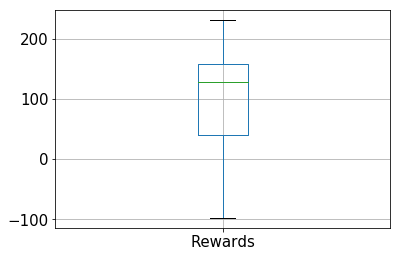

In [0]:
print("RL Boltzman Model Rewards Boxplot")
rl_player_boltzpolicy_rewards.boxplot(grid = True,fontsize=15)

### Reflect on the performance of each model.

Taken Input dataset of Number of images: **63671**  of 84 x 84 resized.


*   CNN - It mostly end up in negative rewards with outlier reward of **-985.059619** from this we can infer that its unstable in some scenarios which could book a big loss. Due to which average reward also gets imapcted finally came to **-341**.

**Accuracy : 0.5687397708674304**

              precision    recall  f1-score   support

           0       0.69      0.54      0.60       611
           1       0.62      0.71      0.67       611
           2       0.39      0.35      0.37       611
           3       0.57      0.67      0.62       611

   micro avg       0.57      0.57      0.57      2444
   
   macro avg       0.57      0.57      0.56      2444
   
weighted avg       0.57      0.57      0.56      2444

**Confusion Matrix**

[ [327  92  94  98]

  [ 45 436 113  17]
 
  [ 44 159 216 192]
 
  [ 55  12 133 411] ]


**RNN Models:**


*   RNN with EPS Greedy managed to get neutral rewards with closer to 0 that is **-71.535130**
  
* RNN with BoltzmannQPolicy got **102.808015** positive rewards worked out better than previous 2 models.




They are both different architecture’s of neural nets that perform well on different types of data. 

As Convolutional Neural Networks(CNN) is a feed forward neural network that is generally used for Image recognition and object classification. In the model prepared essentially have three parts, convolution layers, pooling layers(MaxPooling and AveragePooling), and fully-connected layers to extract hidden patterns. It ran on GrayScaled Images so 2D matrix were computed.

* CNN did not perform well compared to RNN Because CNN starts at the top left and takes a small window with a provided width(84) and height(84) and performs an operation on that, the operation is usually a matrix multiplication where the matrix to multiply by is decided via gradient descent to get the best final results. It then moves according to a stride parameter and does the same. It does this all the way across the image and outputs a new image. Pooling is similar in the sense that it breaks the image down using small windows; however, the operation it runs on this small window is usually (average, max, or min) to combine the small window into a single pixel. After a set amount of convolutions and pooling, the final output is put through a fully connected layer, which is a conventional feed forward neural network to output a result.
the pooling and convolution layers as a form of image pre-processing similar to what was done in traditional computer vision, except the parameters like the matrix in each convolution layer is decided by gradient descent.

Reinforcement Learning works on the principle of saving the output of a layer and feeding this back to the input in order to predict the output of the layer. 

* RNN worked pretty well compared to CNN between the two policies BoltzmannQPolicy and EpsGreedyQPolicy, Boltzmann's technique which follows probability law on q values and selects random action outperformed the EPSGreedy's random action with probability epsilon.
other reason it did good as it considers the current input and also the previously received inputs. It can memorize previous inputs due to its internal memory. RNN can handle sequential data while CNN cannot.

RNNs are good with series of data (one thing happens after another) while CNNs are especially good at problems like image classification.

### Amount of computation required to train each model


It mostly depends on the network implementation and but as we increase the number of layers in RNN will get slower because of multiplications kept for later computations. 

CNN training took longer time than RNN in case of models trained in this exercise.